<div style="background-color:rgba(0, 225, 0, 0.1)"> 

# Submitted by: Umer Farooq
# Program: Data Analysis Nanodegree
# Project 2: Ingvestigating the dataset for no-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)"> 

<a id='intro'></a>
## 1) Introduction

We have chosen the dataset that contains data on no-show appointments from over a hundred thoudand cases in Brazil. A number of characteristics or associated features are presented along with the information on if a patient was able to show up for the appointment or not.

The features are as follows:

**PatientId**: <span style="color:red">Identification of a patient</span> <br>
**AppointmentId**: <span style="color:red">Identification of each appointment</span> <br>
**Gender**: <span style="color:red">Gender of the patient, male or female</span> <br>
**ScheduledDay**: <span style="color:red">The day of the scheduled appointment, when patient has to visit the doctor</span> <br>
**AppointmentDay**: <span style="color:red">The day appointment was made</span> <br>
**Age**: <span style="color:red">How old is the patient</span> <br>
**Neighborhood**: <span style="color:red">The location of hopital where appointment was made</span> <br>
**Scholarship**: <span style="color:red">Whether the patient has a financial scholarship or not</span> <br>
**Hipertension**: <span style="color:red">Whether the patient has  hipertension or not</span> <br>
**Diabetes**: <span style="color:red">Whether the patient has  diabetes or not</span> <br>
**Alchoholism**: <span style="color:red">Whether the patient suffers from alchoholism or not</span> <br>
**HandCap**: <span style="color:red">Whether the patient is handicapped or not</span> <br>
**SMS_received**: <span style="color:red">Were any SMS recieved by the patient</span> <br>
**No-show**: <span style="color:red">No if patient showed up, Yes if they did not</span> <br>

</div>


<div style="background-color:rgba(0, 225, 0, 0.1)"> 

**Some questions that we will try to answer by analyzing this data are as follows:** <br>
<br>
**Q1:** What fraction of the total appointments made had a no-show?  <br>
**Q2:** How many appointments were made by male and female patients? How likely are each to not show up?<br>
**Q3:** Does there seem to be any link between age and not showing up? <br>
**Q4:** Which are the top ten neighbourhoods by number of appointments? Which of these neighborhoods had the highest propotion of appointments made by patients with a scholarship? Which one had lowest?<br>
**Q5:** Is receiving SMS effective in making sure the appointment is not missed?  <br>
**Q6:** Investigate the effect of any disabilities on no-show trends. Out of the four disabilities (hipertension, diabetes, alchoholism, handicapped), which might be the most major factor causing no-show?<br>
**Q7:** Among patients who booked more than ten appointments, how many never missed an appointment?<br>
**Q8:** Compare and contrast the no-show trends based on different days of the week.<br>

</div>    

In [1]:
# First step in code is to import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display as disp
%matplotlib inline

<div style="background-color:rgba(0, 225, 0, 0.1)"> 
    
<a id='wrangling'></a>
## 2) Data Wrangling

Now we will import the data from the csv file and store it in a pandas dataframe. We will then inspect the data, look at some of its properties and then decide what needs to be cleaned.

    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)"> 
    
<a id='wrangling'></a>
### General Properties
</div>

In [2]:
# Reading the data and storing into a pandas daraframe

medical_data = pd.read_csv('KaggleV2-May-2016.csv')

# Inspecting the data

disp(medical_data.head(3))
disp(medical_data.describe())
disp(medical_data.info())

# checking for any mising data
disp('Total number of NaN values in the dataset: {}'.format(medical_data.isnull().sum().sum()))

# checking for any duplicate rows
disp('Number of duplicate rows in the dataset: {}'.format(sum(medical_data.duplicated())))

# checking for any irregularities in the binary data present
disp('Gender unique values: {}'.format(medical_data['Gender'].unique()))
disp('Scholarship unique values: {}'.format( medical_data['Scholarship'].unique()))
disp('Hipertension unique values: {}'.format(medical_data['Hipertension'].unique()))
disp('Diabetes unique values: {}'.format(medical_data['Diabetes'].unique()))
disp('Alcoholism unique values: {}'.format(medical_data['Alcoholism'].unique()))
disp('Handcap unique values: {}'.format(medical_data['Handcap'].unique()))
disp('SMS_received unique values: {}'.format(medical_data['SMS_received'].unique()))
disp('No-show unique values: {}'.format(medical_data['No-show'].unique()))

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


None

'Total number of NaN values in the dataset: 0'

'Number of duplicate rows in the dataset: 0'

"Gender unique values: ['F' 'M']"

'Scholarship unique values: [0 1]'

'Hipertension unique values: [1 0]'

'Diabetes unique values: [0 1]'

'Alcoholism unique values: [0 1]'

'Handcap unique values: [0 1 2 3 4]'

'SMS_received unique values: [0 1]'

"No-show unique values: ['No' 'Yes']"

<div style="background-color:rgba(0, 225, 0, 0.1)">

## After data inspection:

There are a total of 110527 rows and 14 columns (including the no-show column). <br>

The data types of the columns are as follows: <br>
    
**PatientId**: <span style="color:red">float</span> <br>
**AppointmentId**: <span style="color:red">int</span> <br>
**Gender**: <span style="color:red">object (string)</span> <br>
**ScheduledDay**: <span style="color:red">object (string)</span> <br>
**AppointmentDay**: <span style="color:red">object (string)</span> <br>
**Age**: <span style="color:red">int</span> <br>
**Neighborhood**: <span style="color:red">object (string)</span> <br>
**Scholarship**: <span style="color:red">int (0 or 1)</span> <br>
**Hipertension**: <span style="color:red">int (0 or 1)</span> <br>
**Diabetes**: <span style="color:red">int (0 or 1)</span> <br>
**Alchoholism**: <span style="color:red">int (0 or 1)</span> <br>
**HandCap**: <span style="color:red">int (0 or 1)</span> <br>
**SMS_received**: <span style="color:red">int</span> <br>
**No-show**: <span style="color:red">object (string) (Yes or No)</span> <br>
    
</div> 

<div style="background-color:rgba(0, 225, 0, 0.1)">

## What needs to be cleaned?


**Missing data (no change)**: There is no missing data to account for. <br>
**Duplicate rows (no change)**: There are no duplicate rows to account for. <br>
 
**Column names (change)**: symbols will be removed from SMS_Recieved and No-show labels. First letters will be capitalized. The last 'D' of AppointmentID will also be changed to lower case. (just for consistency)<br>    
**PatientId data type (change)**: needs to be changed from scientific notation. We will store this as a string as this has no numerical significance. <br>
**AppointmentId data type (change)**: We will store this as a string as this has no numerical significance. <br>
**Age values (change)**: It can be observed in the summary that min age is negative. Since negative age is non physical, age column needs to be cleaned. <br>
**No-show (change)**: The data in no-show column will be changed from Yes and No to 1 and 0 of type int, to make it more compatable for analysis. <br>
**Handcap (change)**: This will just be treated as true or false. Is the person handicaped or not. So all nonzero values will just be converted to 1. <br>
**ScheduledDay data type (change)**: will change from string to datetime object. <br>
**AppointmentDay data type (change)**: will change from string to datetime object. <br>
**New Column addition**: We add a new column called **ScheduledWeekDay** that has the name of the weekday of scheduled appointment stored as a string. We will insert it right after the AppointmentDay column.
</div> 

In [3]:
########### Changing column names

medical_data = medical_data.rename(columns = {'SMS_received': 'SMSReceived', 'No-show':'NoShow', 'AppointmentID': 'AppointmentId' })

In [4]:
########### Changing PatientId data type from float to string

# to get rid of the extraneous decimal in the string we use .apply method
medical_data['PatientId'] = medical_data['PatientId'].apply(lambda x: str(x).split('.')[0])

In [5]:
########### Changing AppointmentId data type from int to string

medical_data['AppointmentId'] = medical_data['AppointmentId'].astype(str)

In [6]:
########### Fixing the values in the Age column

# checking for rows with negative age
disp(medical_data[medical_data['Age'] < 0])

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
# Upon investigation it turns out that there is only one row with a negative age (-1)
# There are rows with age 0 present but that can be thought of anyone less than age 1 (infant) and is logical.
# we will just drop the row with the negative age.
medical_data = medical_data.drop([99832], axis = 0)
# just to readjust indices we do the following
medical_data.index = np.arange(medical_data.shape[0])

In [8]:
########### Fixing the values in the no show column

# First replacing strings with strings
medical_data.loc[medical_data['NoShow']=='Yes','NoShow'] = '1'
medical_data.loc[medical_data['NoShow']=='No','NoShow'] = '0'
# Then changing type to int
medical_data['NoShow'] = medical_data['NoShow'].astype(int)

In [9]:
########### Fixing the values in the Handcap column

medical_data.loc[medical_data['Handcap'].isin([2,3,4]) , 'Handcap'] = 1

In [10]:
########### Changing ScheduledDay column to datetime

medical_data['ScheduledDay'] = pd.to_datetime(medical_data['ScheduledDay'])
# using brasilia standard time as timezone
medical_data['ScheduledDay'] = medical_data['ScheduledDay'].dt.tz_convert('Brazil/East')

In [11]:
########### Changing AppointmentDay column to datetime

medical_data['AppointmentDay'] = pd.to_datetime(medical_data['AppointmentDay'])
# using brasilia standard time as timezone
medical_data['AppointmentDay'] = medical_data['AppointmentDay'].dt.tz_convert('Brazil/East')

In [12]:
########### Creating and inserting the ScheduledWeekDay column

Days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ScheduledDayList = []
for date in medical_data.ScheduledDay:
    ScheduledDayList.append(Days_of_week[date.weekday()])
ScheduledDayArray = np.array(ScheduledDayList)
medical_data.insert(5, 'ScheduledWeekDay', ScheduledDayArray)

In [13]:
# Examining the changes 

disp(medical_data.head(3))
disp(medical_data.info())

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,ScheduledWeekDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29 15:38:08-03:00,2016-04-28 21:00:00-03:00,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 13:08:27-03:00,2016-04-28 21:00:00-03:00,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 13:19:04-03:00,2016-04-28 21:00:00-03:00,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110525
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype                      
---  ------            --------------   -----                      
 0   PatientId         110526 non-null  object                     
 1   AppointmentId     110526 non-null  object                     
 2   Gender            110526 non-null  object                     
 3   ScheduledDay      110526 non-null  datetime64[ns, Brazil/East]
 4   AppointmentDay    110526 non-null  datetime64[ns, Brazil/East]
 5   ScheduledWeekDay  110526 non-null  object                     
 6   Age               110526 non-null  int64                      
 7   Neighbourhood     110526 non-null  object                     
 8   Scholarship       110526 non-null  int64                      
 9   Hipertension      110526 non-null  int64                      
 10  Diabetes          110526 non-null  int64                      
 11  

None

<div style="background-color:rgba(0, 225, 0, 0.1)">

<a id='eda'></a>
## 3) Exploratory Data Analysis

Here we address the questions posed earlier. We will do analysis, run statistics and create visulizations to support our answers.

</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q1: What fraction of the total appointments made had a no-show? 
    
</div>

0.7980656135208005

0.20193438647919945

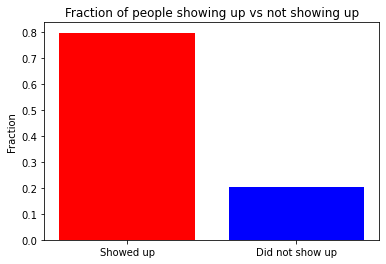

In [17]:
# We will get the number of 0s and 1s in the no show column and use the total number of rows to analyze this question

num_showed_up = medical_data['NoShow'].value_counts()[0]
num_didnt_showed_up = medical_data['NoShow'].value_counts()[1]
total_appointments = medical_data.shape[0]
fraction_showed_up = num_showed_up/total_appointments
fraction_didnt_showed_up = num_didnt_showed_up/total_appointments
disp(fraction_showed_up)
disp(fraction_didnt_showed_up)

# Lets make a bar chart
plt.bar(['Showed up', 'Did not show up'], [fraction_showed_up,fraction_didnt_showed_up], color = ['red' , 'blue']);
plt.title("Fraction of people showing up vs not showing up")
plt.ylabel("Fraction");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q1 Response: 
Nearly four-fifth of the appointments had people show up and one-fifth ended in no-show, based on the data.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q2: How many appointments were made by male and female patients? How likely are each to not show up? 
    
</div>

'percentage  of appointments made by females: 64.99737618297956%'

'percentage  of appointments made by males: 35.00262381702043%'

'likelihood  of females not showing up: 0.20314870752655242%'

'likelihood  of males ot showing up: 0.19967947889471915%'

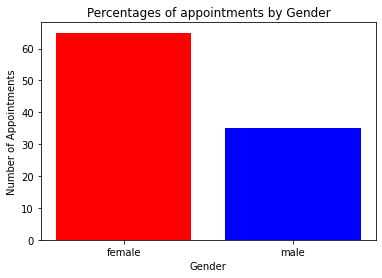

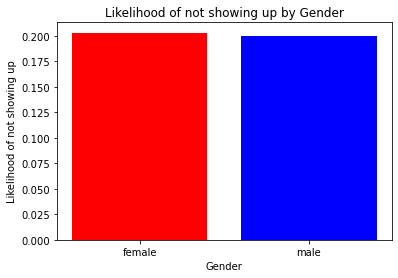

In [49]:
# We group the data by male and female to run statistics

percent_fem = medical_data.groupby(['Gender'])['NoShow'].count()['F']*100/medical_data.shape[0]
percent_male = medical_data.groupby(['Gender'])['NoShow'].count()['M']*100/medical_data.shape[0]
disp('percentage  of appointments made by females: {}%'.format(percent_fem))
disp('percentage  of appointments made by males: {}%'.format(percent_male))

gender_data = medical_data.groupby(['Gender','NoShow'])['NoShow'].count()
fem_noshow_likelihood = gender_data[('F',1)]/(gender_data[('F',1)] + gender_data[('F',0)])
male_noshow_likelihood = gender_data[('M',1)]/(gender_data[('M',1)] + gender_data[('M',0)])
disp('likelihood  of females not showing up: {}%'.format(fem_noshow_likelihood))
disp('likelihood  of males not showing up: {}%'.format(male_noshow_likelihood))

# Lets create visualization for both analyses

plt.figure(0)
plt.bar(['female', 'male'], [percent_fem,percent_male], color = ['red' , 'blue'])    
plt.title("Percentages of appointments by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Appointments");
plt.show()

# Use plt.figure() to show multiple plots
# looks better if years input as strings

plt.figure(1)
plt.bar(['female', 'male'], [fem_noshow_likelihood,male_noshow_likelihood], color = ['red' , 'blue'])    
plt.title("Likelihood of not showing up by Gender")
plt.xlabel("Gender")
plt.ylabel("Likelihood of not showing up");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q2 Response:

First of all, we can see that 65% of appointments were made by females. This might imply that females tend to take better care of their health compared to males. <br><br>
As it turns out, based on the data, once an appointment has been made males and females have a nearly equal likelihood (0.2) of not showing up.      
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q3: Does there seem to be any link between age and not showing up? 
    
</div>

In [51]:
medical_data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# First lets have a quick look the average ages of people showing up and not showing up

disp(medical_data.groupby('NoShow')['Age'].mean())

# now lets divide the ages into four bins and investigate likelihood of not showing up for each bin.
# We choose the edge values for the ages based on values from the .describe table for the dataset 
edges = [ 0, 18 ,37 ,55 ,115 ]
names = ['Child' ,'Young Adult' ,'Older Adult' ,'Old' ] 
# Lets create an AgeRange column
medical_data['AgeRange'] = pd.cut(medical_data['Age'], edges, labels=names)
# Lets check for successful creation of this column
disp(medical_data.head(3))

NoShow
0    37.790504
1    34.317667
Name: Age, dtype: float64

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,ScheduledWeekDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,AgeRange
0,29872499824296,5642903,F,2016-04-29 15:38:08-03:00,2016-04-28 21:00:00-03:00,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Old
1,558997776694438,5642503,M,2016-04-29 13:08:27-03:00,2016-04-28 21:00:00-03:00,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Old
2,4262962299951,5642549,F,2016-04-29 13:19:04-03:00,2016-04-28 21:00:00-03:00,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,0,Old


'likelihood  of a child not showing up: 0.2253721325068109%'

'likelihood  of a young adult not showing up: 0.23537614678899083%'

'likelihood  of an older adult not showing up: 0.1953095963725563%'

'likelihood  of an old person not showing up: 0.1564499709133217%'

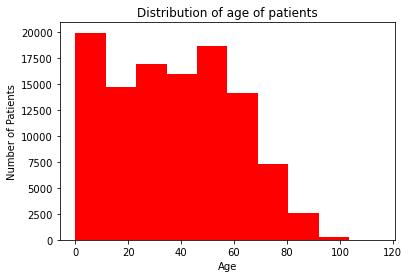

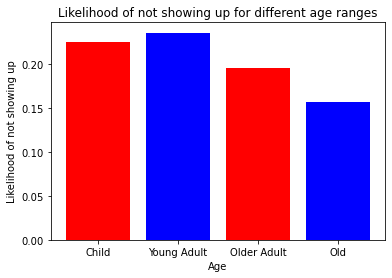

In [86]:
# Now lets the likelihood of no show for each age range
age_data = medical_data.groupby(['AgeRange','NoShow'])['NoShow'].count()
child_noshow_likelihood = age_data[('Child',1)]/(age_data[('Child',1)] + age_data[('Child',0)])
yadult_noshow_likelihood = age_data[('Young Adult',1)]/(age_data[('Young Adult',1)] + age_data[('Young Adult',0)])
oadult_noshow_likelihood = age_data[('Older Adult',1)]/(age_data[('Older Adult',1)] + age_data[('Older Adult',0)])
old_noshow_likelihood = age_data[('Old',1)]/(age_data[('Old',1)] + age_data[('Old',0)])
disp('likelihood  of a child not showing up: {}%'.format(child_noshow_likelihood))
disp('likelihood  of a young adult not showing up: {}%'.format(yadult_noshow_likelihood))
disp('likelihood  of an older adult not showing up: {}%'.format(oadult_noshow_likelihood))
disp('likelihood  of an old person not showing up: {}%'.format(old_noshow_likelihood))

# We can also look at a histogram of the age data 
plt.figure(0)
plt.hist(medical_data.Age, color = ['red' ])    
plt.title('Distribution of age of patients')
plt.xlabel("Age")
plt.ylabel("Number of Patients");
plt.show()

# Then the likelihood of no show can be observed in a bar chart
likelihoods = [child_noshow_likelihood, yadult_noshow_likelihood, oadult_noshow_likelihood, old_noshow_likelihood]
plt.figure(1)
plt.bar(['Child' ,'Young Adult' ,'Older Adult' ,'Old' ], likelihoods, color = ['red', 'blue' ])    
plt.title('Likelihood of not showing up for different age ranges')
plt.xlabel("Age")
plt.ylabel("Likelihood of not showing up");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q3 Response: 

Firstly we can observe from the histogram that most frequent appointments involve children. <br><br>
By rounding up numbers, we can see that the average age of patients showing up is 38 while its 34 for people not showing up. This might suggest that older people show up more often, but further investigation is needed. <br><br>
Upon investigating further we find out that the likelihood of showing up does seem to increase with age. Data suggests that young adults are most likely to not show up, which makes sense, due to busy lifestyle in that age.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q4: Which are the top ten neighbourhoods by number of appointments made? Which of these neighborhoods had the highest propotion of appointments made by patients with a scholarship? Which one had lowest?
    
</div>

'maximum scholarship propotion is 0.171455938697318'

'minimum scholarship propotion is 0.002837245292752128'

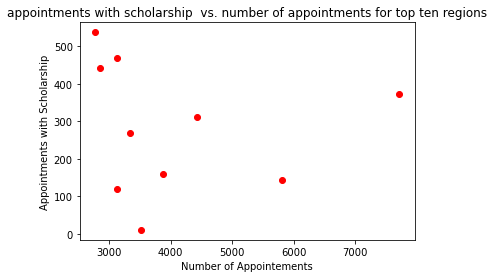

In [210]:
# Lets separate the top ten into a new dataframe 

top_ten = medical_data['Neighbourhood'].value_counts()[0:10]
top_ten_df = medical_data[medical_data['Neighbourhood'].isin(top_ten.index)]
# Now lets get the propotion of appointments with a scholarship for each

scholarship_propotions = top_ten.copy()
scholarship_propotions = scholarship_propotions.astype(float) # to be able to save decimals in the loop
top_ten_data = top_ten_df.groupby(['Neighbourhood','Scholarship'])['Scholarship'].count()
for neighbourhood in top_ten.index:
    scholarship_propotion = top_ten_data[(neighbourhood,1)]/(top_ten_data[(neighbourhood,1)] + top_ten_data[(neighbourhood,0)])
    scholarship_propotions[neighbourhood] = scholarship_propotion
disp('maximum scholarship propotion is {}'.format(scholarship_propotions.max()))
disp('minimum scholarship propotion is {}'.format(scholarship_propotions.min()))

# Lets visualize the scatter plot of number of appointments in the ten regions and the number of scholarships
plt.scatter(top_ten, top_ten_data[:,1], alpha = 1, color = 'red')
plt.title('appointments with scholarship  vs. number of appointments for top ten regions')
plt.xlabel("Number of Appointements")
plt.ylabel("Appointments with Scholarship");

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### scatter plot comments: 
    
there seems to be no visbile correlation between the total number of appointments and number of appointments with scholarship from the scatter plot.
    
</div>

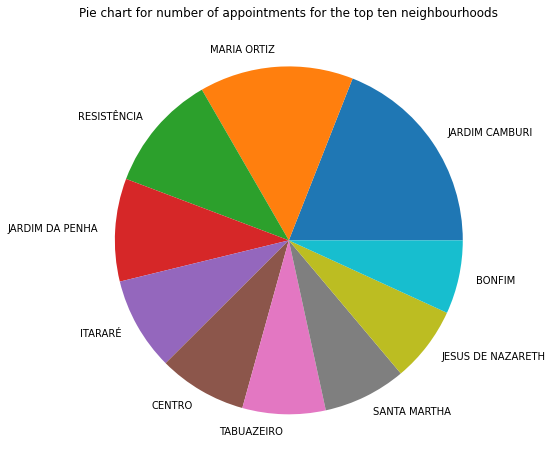

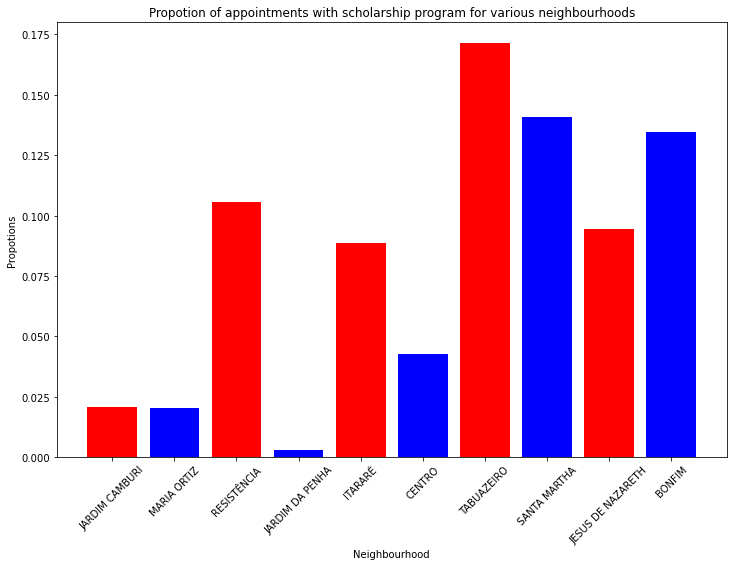

In [144]:
# Lets visualize the top ten neighbourhoods by number of appointments in a pie chart
plt.figure(figsize=(8,8))
plt.pie(top_ten, labels = top_ten.index)
plt.title('Pie chart for number of appointments for the top ten neighbourhoods')

# Lets visualize the propotions
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.bar(scholarship_propotions.index, scholarship_propotions, color = ['red', 'blue' ])    
plt.title('Propotion of appointments with scholarship program for various neighbourhoods')
plt.xlabel("Neighbourhood")
plt.ylabel("Propotions")
plt.show()

In [229]:
# Lets also see if havinga scholarhip increases chances of showing up

schol_data = medical_data.groupby(['Scholarship','NoShow'])['NoShow'].count()
disp(SMS_data)
noSchol_likelihood = schol_data[(0,0)]/(schol_data[(0,1)] + schol_data[(0,0)])
schol_likelihood = schol_data[(1,0)]/(schol_data[(1,1)] + schol_data[(1,0)])
disp('likelihood  of showing up if dont have scholarship: {}%'.format(noSchol_likelihood))
disp('likelihood  of showing up if have scholarship: {}%'.format(schol_likelihood))

SMSReceived  NoShow
0            0         62509
             1         12535
1            0         25698
             1          9784
Name: NoShow, dtype: int64

'likelihood  of showing up if dont have scholarship: 0.8019264536196258%'

'likelihood  of showing up if have scholarship: 0.7626369579228433%'

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q4 Response: 
    
The names of the top ten neighbourhoods by number of appointments can be seen in the chart above. <br><br>
'TABUAZEIRO' is the neighbourhood with th highest propotion of appointments with a scholarship program having a value of 17.14%. <br><br>
'JARDIM DA PENHA' is the one with the least propotion of 0.28%. <br> <br>
Combining our observations from both the charts, The neighbourhoods with most appointments tend to have least number of people with scholarships, with an exception of RESISTENCIA.<br><br>
After doing some statistics, evidence could not be found that presence of scholarship will considerably increase the probability of patient showing up. 
    
</div>

SMSReceived  NoShow
0            0         62509
             1         12535
1            0         25698
             1          9784
Name: NoShow, dtype: int64

'likelihood  of not showing up without SMS: 0.19807354638037425%'

'likelihood  of not showing up with SMS: 0.2373630420771568%'

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q5: Is receiving SMS effective in making sure the appointment is not missed? 
    
</div>



SMSReceived  NoShow
0            0         62509
             1         12535
1            0         25698
             1          9784
Name: NoShow, dtype: int64

'likelihood  of not showing up without SMS: 0.16703533926762965%'

'likelihood  of not showing up with SMS: 0.27574544839637%'

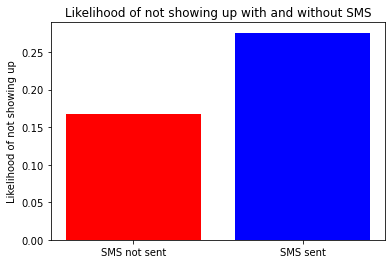

In [146]:
# Lets group data by SMSReceived

SMS_data = medical_data.groupby(['SMSReceived','NoShow'])['NoShow'].count()
disp(SMS_data)
noSMS_likelihood = SMS_data[(0,1)]/(SMS_data[(0,1)] + SMS_data[(0,0)])
SMS_likelihood = SMS_data[(1,1)]/(SMS_data[(1,1)] + SMS_data[(1,0)])
disp('likelihood  of not showing up without SMS: {}%'.format(noSMS_likelihood))
disp('likelihood  of not showing up with SMS: {}%'.format(SMS_likelihood))

# Lets create visualization for both analyses

plt.figure(0)
plt.bar(['SMS not sent', 'SMS sent'], [noSMS_likelihood,SMS_likelihood], color = ['red' , 'blue'])    
plt.title("Likelihood of not showing up with and without SMS")
plt.ylabel("Likelihood of not showing up");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q5 Response: 
    
Very surprisingly, A bigger propotion of patients did not show up when SMS was received. <br><br>
It can not be claimed that sending SMS caused the no show. But still, we could not find evidence that sending SMS is effective in making sure that an appointment is not missed. 
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q6: Investigate the effect of any disabilities on no-show trends. Out of the four disabilities (hipertension, diabetes, alchoholism, handicapped), which might be the most major factor causing no-show?
    
</div>

0    84114
1    18123
2     7658
3      618
4       13
Name: Disability, dtype: int64

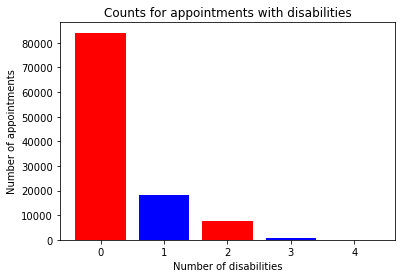

Disability  NoShow
0           0         66511
            1         17603
1           0         14874
            1          3249
2           0          6290
            1          1368
3           0           523
            1            95
4           0             9
            1             4
Name: NoShow, dtype: int64

[0.209275507049956,
 0.17927495447773548,
 0.17863671977017498,
 0.15372168284789645,
 0.3076923076923077]

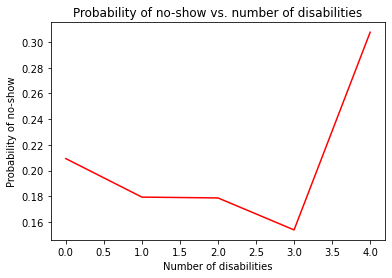

In [246]:
# First lets observe no show trends for patients with and without any disabilities

# Lets separate partients ability who dont have any disability and patients have one.
# We can conveniently do this by making a column called Disability that simply takes the OR of all four disabilities.

medical_data['Disability']  = medical_data['Hipertension'] + medical_data['Diabetes'] + medical_data['Alcoholism'] + medical_data['Handcap']

disability_counts = medical_data['Disability'].value_counts()
disp(disability_counts)

# Lets visualize cases with one or more disabilities
plt.bar(disability_counts.index, disability_counts, color = ['red', 'blue' ])    
plt.title('Counts for appointments with disabilities')
plt.xlabel("Number of disabilities")
plt.ylabel("Number of appointments")
plt.show()

# Now we check for probability of no show for each number of disabilities
disability_data = medical_data.groupby(['Disability','NoShow'])['NoShow'].count()
disp(disability_data)
no_disab_noshow_likelihood = disability_data[(0,1)]/(disability_data[(0,1)] + disability_data[(0,0)])
one_disab_noshow_likelihood = disability_data[(1,1)]/(disability_data[(1,1)] + disability_data[(1,0)])
two_disab_noshow_likelihood = disability_data[(2,1)]/(disability_data[(2,1)] + disability_data[(2,0)])
three_disab_noshow_likelihood = disability_data[(3,1)]/(disability_data[(3,1)] + disability_data[(3,0)])
four_disab_noshow_likelihood = disability_data[(4,1)]/(disability_data[(4,1)] + disability_data[(4,0)])

disability_count_list = [0,1,2,3,4]
noshow_prob_list = [no_disab_noshow_likelihood,one_disab_noshow_likelihood,two_disab_noshow_likelihood,three_disab_noshow_likelihood,four_disab_noshow_likelihood]
disp(noshow_prob_list)
plt.plot(disability_count_list,noshow_prob_list, color = 'red');
plt.title('Probability of no-show vs. number of disabilities')
plt.xlabel("Number of disabilities")
plt.ylabel("Probability of no-show")
plt.show()

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Comments
By looking at the plot above, it seems as the number of disbabilties increases, the likelihood of skipping apppointment decreases. Untill we reach maximum number of four, in which case probability of no show shoots up.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">

***To analyze individual disabilities, for accuracy, we only take the cases where patient suffers from a single disability.***
    
</div>

In [241]:
# taking a look at value counts for various disabilities

hypertension_data = medical_data[medical_data['Disability'] == 1]['Hipertension'].value_counts()
diabetes_data = medical_data[medical_data['Disability'] == 1]['Diabetes'].value_counts()
alcoholism_data = medical_data[medical_data['Disability'] == 1]['Alcoholism'].value_counts()
handicapped_data = medical_data[medical_data['Disability'] == 1]['Handcap'].value_counts()

# calculating the probabilities of someone having specific disabilities (strictly based on the dataset).
prob_hipertension = hypertension_data[1]/(hypertension_data[1] + hypertension_data[0])
prob_diabetes = diabetes_data[1]/(diabetes_data[1] + diabetes_data[0])
prob_alcoholism = alcoholism_data[1]/(alcoholism_data[1] + alcoholism_data[0])
prob_handicapped = handicapped_data[1]/(handicapped_data[1] + handicapped_data[0])
disp('probability of an appointment with patient having only hipertension: {}'.format(prob_hipertension))
disp('probability of an appointment with patient having only diabetes: {}'.format(prob_diabetes))
disp('probability of an appointment with patient with only alcoholism: {}'.format(prob_alcoholism))
disp('probability of an appointment with only a handicapped patient: {}'.format(prob_handicapped))

'probability of an appointment with patient having only hipertension: 0.7539038790487226'

'probability of an appointment with patient having only diabetes: 0.07399437179274955'

'probability of an appointment with patient with only alcoholism: 0.10605308171936213'

'probability of an appointment with only a handicapped patient: 0.0660486674391657'

Hipertension  NoShow
0             0          3536
              1           924
1             0         11338
              1          2325
Name: NoShow, dtype: int64

Diabetes  NoShow
0         0         13806
          1          2976
1         0          1068
          1           273
Name: NoShow, dtype: int64

Alcoholism  NoShow
0           0         13368
            1          2833
1           0          1506
            1           416
Name: NoShow, dtype: int64

Handcap  NoShow
0        0         13912
         1          3014
1        0           962
         1           235
Name: NoShow, dtype: int64

'likelihood  of not showing when has hypertension: 0.17016760594305788%'

'likelihood  of not showing when has diabetes: 0.203579418344519%'

'likelihood  of not showing when has alcoholism: 0.21644120707596254%'

'likelihood  of not showing when is handicapped: 0.19632414369256473%'

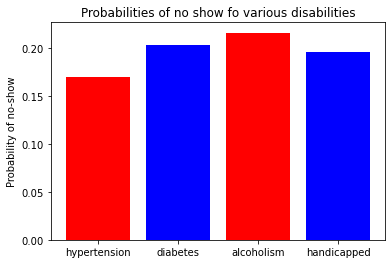

In [248]:
# Next we find probabilities of no show given the patient has each of the disabilities.

hypertension_data =  medical_data[medical_data['Disability'] == 1].groupby(['Hipertension','NoShow'])['NoShow'].count()
diabetes_data =  medical_data[medical_data['Disability'] == 1].groupby(['Diabetes','NoShow'])['NoShow'].count()
alcoholism_data =  medical_data[medical_data['Disability'] == 1].groupby(['Alcoholism','NoShow'])['NoShow'].count()
handicapped_data =  medical_data[medical_data['Disability'] == 1].groupby(['Handcap','NoShow'])['NoShow'].count()

# Calculating probabilities of no show for each disability
disp(hypertension_data)
disp(diabetes_data)
disp(alcoholism_data)
disp(handicapped_data)

hypertension_noshow_likelihood = hypertension_data[(1,1)]/(hypertension_data[(1,1)] + hypertension_data[(1,0)])
diabetes_noshow_likelihood = diabetes_data[(1,1)]/(diabetes_data[(1,1)] + diabetes_data[(1,0)])
alcoholism_noshow_likelihood = alcoholism_data[(1,1)]/(alcoholism_data[(1,1)] + alcoholism_data[(1,0)])
handicapped_noshow_likelihood = handicapped_data[(1,1)]/(handicapped_data[(1,1)] + handicapped_data[(1,0)])

disp('likelihood  of not showing when has hypertension: {}%'.format(hypertension_noshow_likelihood))
disp('likelihood  of not showing when has diabetes: {}%'.format(diabetes_noshow_likelihood))
disp('likelihood  of not showing when has alcoholism: {}%'.format(alcoholism_noshow_likelihood))
disp('likelihood  of not showing when is handicapped: {}%'.format(handicapped_noshow_likelihood))

# Lets visualize probabilities for different disabilities
disabilities = ['hypertension', 'diabetes', 'alcoholism','handicapped' ]
prob_disabilities = [hypertension_noshow_likelihood, diabetes_noshow_likelihood, alcoholism_noshow_likelihood, handicapped_noshow_likelihood]
plt.bar(disabilities, prob_disabilities, color = ['red', 'blue' ])    
plt.title('Probabilities of no show fo various disabilities')
plt.ylabel("Probability of no-show")
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q6 Response:
    
First major thing to note is that Hipertension is the most frequently observed disability with nearly one-fifth the appointments having it.<br><br>
Alcoholism is the disability with the highest no show probability of 22%. <br> <br>
Now all disabilities have more or less similar effect on noshow probability (close to 20%) , but there are far more appointments with hypertension compared to others. It is a reasonable conclusion that hypertension is the most major disability affecting the noshow numbers.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q7: Among patients who booked more than ten appointments, how many never missed an appointment?
    
</div>

In [164]:
# First lets check to see if there are any patients with repeating appointments

disp(medical_data.AppointmentId.nunique())
disp(medical_data.AppointmentId.nunique() - medical_data.PatientId.nunique())

110526

48228

In [200]:
# Lets find out which patients have more than ten appointments

duplicate_counts = medical_data.pivot_table(index = ['PatientId'], aggfunc ='size') 
duplicate_counts = duplicate_counts[duplicate_counts > 10]
disp('Number of patients with more than ten appointments: {}'.format(duplicate_counts.index.nunique()))

# extracting the relevant data in a new dataframe
ten_plus_appointments = medical_data[medical_data['PatientId'].isin(duplicate_counts.index)]
misscounter = 0
for patient_id in duplicate_counts.index:
    if sum(ten_plus_appointments[ten_plus_appointments['PatientId'] == patient_id]['NoShow'].isin([1])):
        misscounter = misscounter + 1
disp('Number of patients who have never missed an appointment: {}'.format(misscounter))


'Number of patients with more than ten appointments: 248'

'Number of patients who have never missed an appointment: 197'

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q7 Response:
   
It can be seen that there are as many appointment Ids as the number of rows and there are 48228 more unique appointment Ids that patients Ids, which means that there are patients with multiple appointments present in the database. <br><br>
By investigating further we find out that there are 248 patients with more than 10 appointments. <br><br>
Finally after doing some manipulation it can be seen that out of the 248 patients with more than ten appointments, 197 have never missed an appointment.
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">
    
### Q8: Compare and contrast the no-show trends based on different days of the week.
    
</div>

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: ScheduledWeekDay, dtype: int64

Text(0.5, 1.0, 'Pie chart for number of appointments by day of the week')

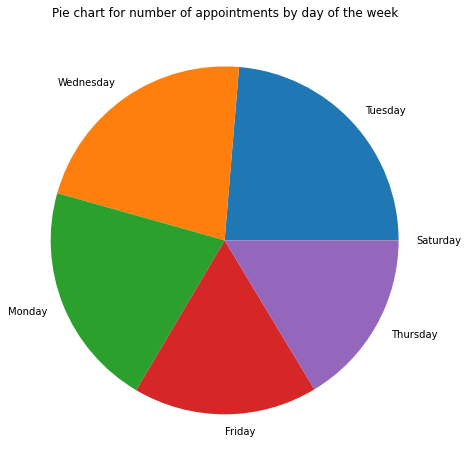

In [219]:
# Lets first get the number of appointment by day of the week

week_day_count = medical_data['ScheduledWeekDay'].value_counts()
disp(week_day_count)

# Lets Visualize this in a pie chart
plt.figure(figsize=(8,8))
plt.pie(week_day_count, labels = week_day_count.index);
plt.title('Pie chart for number of appointments by day of the week')

ScheduledWeekDay  NoShow
Friday            0         15028
                  1          3887
Monday            0         18523
                  1          4561
Saturday          0            23
                  1             1
Thursday          0         14373
                  1          3700
Tuesday           0         20877
                  1          5291
Wednesday         0         19383
                  1          4879
Name: NoShow, dtype: int64

3.9904283483809655

3.8777016341591986

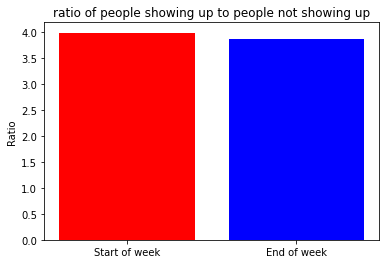

In [220]:
# Now lets investigate if there is a pattern between number of people keeping their appointments based on day of the week

week_day_data = medical_data.groupby('ScheduledWeekDay')['NoShow'].value_counts()
disp(week_day_data)

# Lets observe the ratio of people showing up to people not showing up based on 
# start (Monday, Tuesday, Wednesday) and end (Thursday, Friday, Saturday) of the week
show_start = week_day_data[('Monday',0)] + week_day_data[('Tuesday',0)] + week_day_data[('Wednesday',0)]
noshow_start = week_day_data[('Monday',1)] + week_day_data[('Tuesday',1)] + week_day_data[('Wednesday',1)]
show_end = week_day_data[('Thursday',0)] + week_day_data[('Friday',0)] + week_day_data[('Saturday',0)]
noshow_end = week_day_data[('Thursday',1)] + week_day_data[('Friday',1)] + week_day_data[('Saturday',1)]
start_ratio = show_start/noshow_start
end_ratio = show_end/noshow_end
disp(start_ratio)
disp(end_ratio)

# putting the ratios into a bar chart
plt.bar(['Start of week', 'End of week'], [start_ratio,end_ratio], color = ['red' , 'blue'])    
plt.title("ratio of people showing up to people not showing up")
plt.ylabel("Ratio");
plt.show()

<div style="background-color:rgba(255, 0, 0, 0.1)">
    
### Q8 Response: 
    
The day of appointment (day of the week) was extracted in the data wrangling section by coverting the scheduled day into datetime format. This new column called ScheduledWeekDay was used to analyze this question. <br><br>
By looking at the pie chart, we can see that more people tend to make appointments at the beginning or middle of the week. The number goes down as the weekend approaches, ending with a negiligible number on saturdays. <br><br>
From the bar chart it can be observed that the ratio of people showing up to not showing up is slightly higher for the start of week but the difference is not significant.

    
</div>

In [221]:
medical_data.head(1)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,ScheduledWeekDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,AgeRange
0,29872499824296,5642903,F,2016-04-29 15:38:08-03:00,2016-04-28 21:00:00-03:00,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Old


<div style="background-color:rgba(0, 225, 0, 0.1)">

<a id='conclusions'></a>
## Conclusions

All inferences made, statistical or otherwise, were strictly based on the trends observed in the provided dataset and should not be generally applied worldwide <br> <br>
Data was statistically analyzed and visualized using different tools. After analyzing data and answering questions based on various features, we will conclude with some comments on which characteristics seem to be the most major factors to know for predicting if a patient will not show up or not?<br>

**1)** Both the gender of patient and the day of appointment did not seem to have any major effect on whether a patient will show up or not. <br>
**2)** Age of the patient seemed to be a major factor. There was a clear link noticed in data, between age and likelihood of patients not showing up. Young people were found out to be more likely to skip appointment than older patients. <br>
**3)** It was also noticed that having a scholarship doesnt seem to increase or decrease chances of showing up significantly. <br>
**4)** Of all disabilities, a patient with alcoholism is most likely to not show up, with 22% probability. But there are far more appointments with hypertension compared to other disabilities, with hipertension having no show probability not drastically different from alcoholism (18%). It seems like a reasonable conclusion that hypertension is the most major disability in regards to predicting a no-show. <br>
**5)** No evidence was found that recieving SMS has an effect on decreasing the chances of no-show. <br>
**6)** It was observed that the number or any previous appointments for the same patient had a major effect on the no-show frequency. As it was observed that four-fifth of the patients who had more than 10 appointments had never missed an appointment.<br><br>
**In conclusion, if we had to pick our top predicting factors for a no-show that would be the age, number of previous appointments, alcoholism and hipertension.**
    
</div>

<div style="background-color:rgba(0, 225, 0, 0.1)">

## References
    
kaggle: https://www.kaggle.com/joniarroba/noshowappointments

stackoverflow: https://stackoverflow.com/

pandas documentation: https://pandas.pydata.org/docs/

matplotlib documentation: https://matplotlib.org/3.3.3/contents.html
    
numpy documentation: https://numpy.org/doc/

</div>